In [1]:
# %matplotlib notebook
from pic.Hdf5Viewer import Hdf5Viewer
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u

from plasmapy import particles

In [11]:
# import tkinter as tk
# from tkinter import filedialog
# import os
from pathlib import Path
# %gui tk

# root = tk.Tk()
# root.withdraw()

# currentPath = os.getcwd()
# filename = filedialog.askdirectory(parent=root, initialdir="./data")

filename = Path("data")  / "2025-10-22_18h05"

In [12]:
view = Hdf5Viewer(filename)

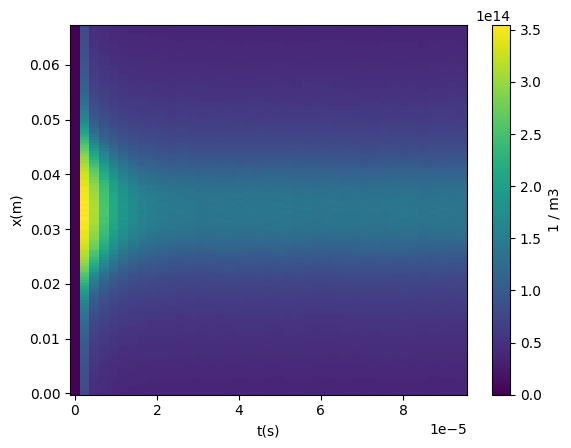

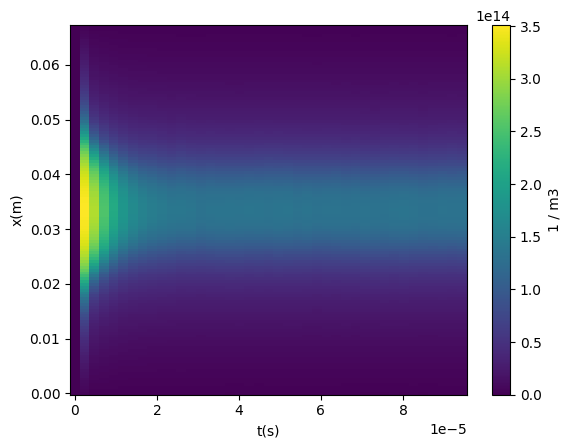

KeyError: 'P'

In [13]:
view.spacetime("n", particles.Particle("He+"))
view.spacetime("n", particles.Particle("e-"))
view.spacetime("P", particles.Particle("e-"))

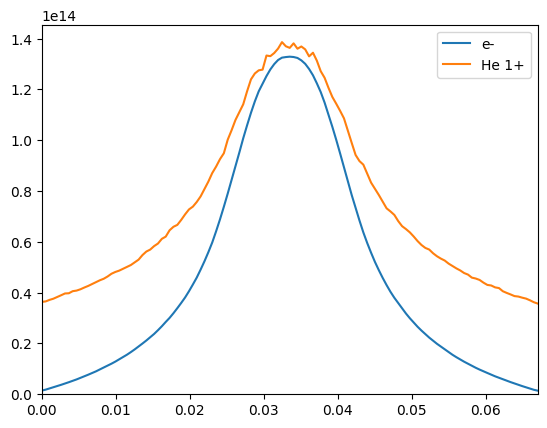

In [14]:
view.densities("100 us")

In [7]:
view.particle_data[particles.electron]["Power"][-1]

<Quantity [-897.22061573, -877.96833565, -828.35905783, -776.63610964,
           -717.78970929, -663.62505209, -609.89421803, -548.16995546,
           -490.33071495, -430.4466921 , -371.70846242, -309.08755919,
           -249.22820732, -184.75865849, -116.28290862,  -51.91582942,
             21.18296014,   87.83218789,  154.94772949,  218.72771824,
            282.98167774,  343.07562721,  402.99435962,  467.60850922,
            537.51891098,  599.62209593,  661.39525068,  718.26650502,
            779.26167616,  842.54491988,  910.3362949 ,  975.02247034,
           1042.12658564, 1100.10260743, 1148.8136719 , 1204.72856848,
           1260.47309111, 1311.48595273, 1343.70517603, 1378.26678193,
           1408.404464  , 1424.69709233, 1425.75696288, 1424.02213466,
           1410.7571378 , 1391.79389799, 1360.72502393, 1310.73241078,
           1253.84866537, 1182.93774571, 1101.24031453, 1020.13071181,
            932.90982217,  839.74594345,  740.7033735 ,  640.97084014,
      

In [ ]:
import pandas as pd

view.densities("290 us")
p_mTorr = 15.0
power = 200
coeff_file = (
    "../fluide/2_IodineTemperature/1_ExperimentalData/DATA/SYNTHESE_LANGMUIR_PROBE_IODINE/COEFF_FIT_%smTorr%sW.csv"
    % (p_mTorr, power)
)

df_coeff = pd.read_csv(coeff_file)

neCoeffs = [df_coeff.Coeff_ne_EEDF[i] for i in range(len(df_coeff.Coeff_ne_EEDF))]
TeCoeffs = [df_coeff.Coeff_Te_EEDF[i] for i in range(len(df_coeff.Coeff_Te_EEDF))]
ne_poly = np.poly1d(neCoeffs)
n_exp = ne_poly(view.x.to_value(u.cm))
plt.plot(view.x, n_exp)